In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from scholarly import scholarly 
import urllib.request
from PIL import Image
import os
import csv
import ast

In [2]:
df = pd.read_csv('Assignment1.csv')

In [ ]:
df['DR-NTU URL']

In [ ]:
# Getting the profile pictures of the professors

os.chdir("dp")

count = 0
for url in df['DR-NTU URL']:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    src = soup.find(class_ = 'image').find('img')['src']
    src = src.replace(' ', '%20')
    img_src = 'https://dr.ntu.edu.sg' + src
    img = Image.open(requests.get(img_src,stream=True).raw)
    img = img.convert('RGB')
    img.save(str(count)+ '.jpg')
    count+=1

In [ ]:
# Getting the background / biography of the professors

bio = []
for url in df['DR-NTU URL']:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    c = soup.find(id = 'biographyDiv').text.replace('\n', '')
    bio.append(c)

bio_df = pd.DataFrame(bio, columns = ['Biography'])

In [ ]:
bio_df.to_csv('bio.csv', index = False)

In [ ]:
research_interest = []
profile_pic = []
prof_name = []
for names in df['Full Name']:
    if names == "Ke Yiping, Kelly" :
        names = names.replace("Ke Yiping, Kelly", "Ke Yiping")
    names = names + ', Nanyang Technological University'
    search_query = scholarly.search_author(names)
    try:
        author = next(search_query)
        if len(author['interests']) == 0:
            research_interest.append(None)
        else:
            research_interest.append(author['interests'])
        profile_pic.append(author['url_picture'])
        prof_name.append(author['name'])
        
    except StopIteration:
        research_interest.append(None)
        profile_pic.append(None)
        prof_name.append(None)

new_df = pd.DataFrame({'Name': prof_name, 'Research Interest': research_interest, 'Profile Picture': profile_pic, })

In [ ]:
test = pd.read_csv('test.csv')
df['Research Interest'] = test['Research Interest']
df

In [ ]:
keywords_df = df[df['Research Interest'].isna()]
keywords_df

In [ ]:
research_interest = []
for url in keywords_df['DR-NTU URL']:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    keyword_list = soup.find_all(class_ = 'rkeyword')
    keywords = []
    for item in keyword_list:
        c = item.text.strip()
        keywords.append(c)
    research_interest.append(keywords)
    

In [ ]:
df['Research Interest'].fillna(research_interest, inplace = True)

In [ ]:
# Getting co-authors from dblp
os.chdir("co_author")


count = 0
for url in df['DBLP URL']:
    names = []
    href = []
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        co_author = soup.find_all(class_ = 'person')
        for item in co_author:
            names.append(item.text)
            href.append(item.find('a')['href'])
        pd.DataFrame(names,href).to_csv(str(count) + '.csv', header = False)
    except:
        print('No dblp page found for ' + str(url))
    count+=1

    

In [ ]:
# trying to get the journals

soup.find(id='coauthor-section').find_all('div')[9::]

In [5]:
bio = pd.read_csv('bio.csv')


In [8]:
df = pd.read_csv('Assignment2.csv')
df['Biography'] = bio['Biography']

In [10]:
df.to_csv('Assignment2.csv', index = False)

dp/0.jpg
dp/1.jpg
dp/2.jpg
dp/3.jpg
dp/4.jpg
dp/5.jpg
dp/6.jpg
dp/7.jpg
dp/8.jpg
dp/9.jpg
dp/10.jpg
dp/11.jpg
dp/12.jpg
dp/13.jpg
dp/14.jpg
dp/15.jpg
dp/16.jpg
dp/17.jpg
dp/18.jpg
dp/19.jpg
dp/20.jpg
dp/21.jpg
dp/22.jpg
dp/23.jpg
dp/24.jpg
dp/25.jpg
dp/26.jpg
dp/27.jpg
dp/28.jpg
dp/29.jpg
dp/30.jpg
dp/31.jpg
dp/32.jpg
dp/33.jpg
dp/34.jpg
dp/35.jpg
dp/36.jpg
dp/37.jpg
dp/38.jpg
dp/39.jpg
dp/40.jpg
dp/41.jpg
dp/42.jpg
dp/43.jpg
dp/44.jpg
dp/45.jpg
dp/46.jpg
dp/47.jpg
dp/48.jpg
dp/49.jpg
dp/50.jpg
dp/51.jpg
dp/52.jpg
dp/53.jpg
dp/54.jpg
dp/55.jpg
dp/56.jpg
dp/57.jpg
dp/58.jpg
dp/59.jpg
dp/60.jpg
dp/61.jpg
dp/62.jpg
dp/63.jpg
dp/64.jpg
dp/65.jpg
dp/66.jpg
dp/67.jpg
dp/68.jpg
dp/69.jpg
dp/70.jpg
dp/71.jpg
dp/72.jpg
dp/73.jpg
dp/74.jpg
dp/75.jpg
dp/76.jpg
dp/77.jpg
dp/78.jpg
dp/79.jpg
dp/80.jpg
dp/81.jpg
dp/82.jpg
dp/83.jpg
dp/84.jpg
dp/85.jpg


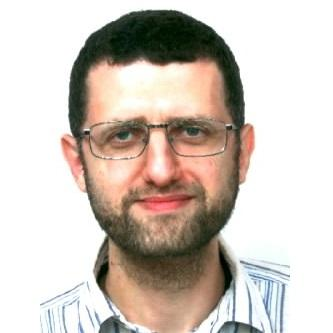

In [12]:
for index,row in df.iterrows():
    image_path = "dp/" + str(index) + ".jpg"
    print(image_path)
Image.open(image_path)

In [29]:
for index,row in df.iterrows():
    c = row['Research Interest']
    print(c)

['Computer Science and Engineering', 'Electrical and Electronic Engineering', 'Info-Communication Technology', 'Interactive Digital Media', 'Internet & Communications', 'Computer Networks and Communications']
['Solid modeling', 'Haptics', 'Virtual reality']
['Computer Architecture', 'Electronic Design Automation', 'Hardware Security', 'Emerging Technologies', 'CPS Security']
['distributed systems', 'socio-technological systems']
['Real-Time Systems', 'Cyber-Physical Systems', 'Embedded Systems']
['Artificial intelligence', 'multi-agent systems', 'game theory', 'reinforcement learning', 'optimization']
['Computer Vision']
['Info-Communication Technology', 'Computer Science and Engineering', 'Interactive Digital Media', 'Internet & Communications']
['Networks', 'Cloud Computing', 'Online Social Networks', 'AI and Optimization']
['Computer Vision', 'Image Processing', 'Machine Learning']
['Multimedia Retrieval', 'Multimedia Web System']
['Speech and Language processing', 'Digital Signal P

In [46]:
df['Research Interest'] = df['Research Interest'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [49]:
df['Research Interest'][0][0]

'Computer Science and Engineering'

In [13]:
from scholarly import scholarly

search_query = scholarly.search_author('AS Madhukumar')
author = next(search_query)
c = scholarly.fill(author,sections = ['basics','counts'])

In [29]:
savethis = c['cites_per_year']

df = pd.DataFrame(list(savethis.items()), columns=['Year', 'Citations'])
df

,Year,Citations
0,2002,18
1,2003,10
2,2004,19
3,2005,53
4,2006,95
5,2007,91
6,2008,113
7,2009,96
8,2010,98
9,2011,125


In [ ]:
# Searching for prof's names on Google Scholar with NTU tag using Scholarly
test_name = []
test_citation = []
test_affiliation = []

citations = []
for names in df['Full Name']:
    if names == "Ke Yiping, Kelly" :
        names = names.replace("Ke Yiping, Kelly", "Ke Yiping")
    if names == 'Li Fang':
        continue
    names = names + ', Nanyang Technological University'
    search_query = scholarly.search_author(names)
    try:
        author = next(search_query)
        
        # Test DataFrame to check if the names and affiliation from Scholarly is correct.
        test_name.append(author['name'])
        test_citation.append(author['citedby'])
        test_affiliation.append(author['affiliation'])

        # Append the citations to the list
        citations.append(author['citedby'])
    except StopIteration:
        citations.append(None)
        # print(f"Professor {names} not found")

In [3]:
df = pd.read_csv('Assignment2.csv')

os.chdir("citations")
for names in df['Full Name']:
    if names == "Ke Yiping, Kelly" :
        names = names.replace("Ke Yiping, Kelly", "Ke Yiping")
    if names == 'Li Fang':
        continue
    try:
        names = names + ', Nanyang Technological University'
        search_query = scholarly.search_author(names)
        author = next(search_query)
        c = scholarly.fill(author,sections = ['basics','counts'])
        savethis = c['cites_per_year']
        df = pd.DataFrame(list(savethis.items()), columns=['Year', 'Citations'])
        df.to_csv(names + '.csv', index = False)
    except:
        print(f"Professor {names} not found")
        
        


Professor Chan Syin, Nanyang Technological University not found
Professor Douglas Leslie Maskell, Nanyang Technological University not found
Professor Jagath Chandana Rajapakse, Nanyang Technological University not found
Professor Josephine Chong, Nanyang Technological University not found
Professor Joty Shafiq Rayhan, Nanyang Technological University not found
Professor Lau Chiew Tong, Nanyang Technological University not found
Professor Li Mo, Nanyang Technological University not found
Professor Luke Ong （翁之昊）, Nanyang Technological University not found
Professor Pan, Sinno Jialin, Nanyang Technological University not found
Professor Quek Hiok Chai, Nanyang Technological University not found
Professor Sourav Saha Bhowmick, Nanyang Technological University not found
Professor Tang Xueyan, Nanyang Technological University not found
Professor Tay Kian Boon, Nanyang Technological University not found
Professor Thambipillai Srikanthan, Nanyang Technological University not found
Professor 

In [14]:
df = pd.read_csv("Assignment2.csv")
df = df.iloc[0]
df['Research Interest'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

AttributeError: 'str' object has no attribute 'apply'

In [16]:
df['Research Interest']

"['Computer Science and Engineering', 'Electrical and Electronic Engineering', 'Info-Communication Technology', 'Interactive Digital Media', 'Internet & Communications', 'Computer Networks and Communications']"